# Classification of salary estimates by age using K-Nearest Neighbors

Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data acquisition

In [2]:
!wget https://raw.githubusercontent.com/Wayan123/dataset-ml/main/Social_Network_Ads.csv

--2023-07-11 07:53:55--  https://raw.githubusercontent.com/Wayan123/dataset-ml/main/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4903 (4.8K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]   4.79K  --.-KB/s    in 0s      

2023-07-11 07:53:55 (73.7 MB/s) - ‘Social_Network_Ads.csv’ saved [4903/4903]



In [3]:
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [4]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
# Split dataset menjadi data training dan data tes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
y_pred = classifier.predict(X_test)

# Confusion Matrix (Evaluation)

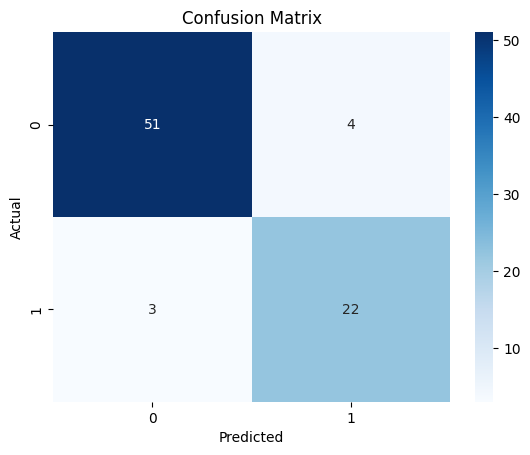

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Menampilkan grafik
plt.show()

In [10]:
# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi model: {:.2%}'.format(accuracy))

Akurasi model: 91.25%


# Visualisasi Test Set

<ipython-input-11-851eb9fb3e12>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


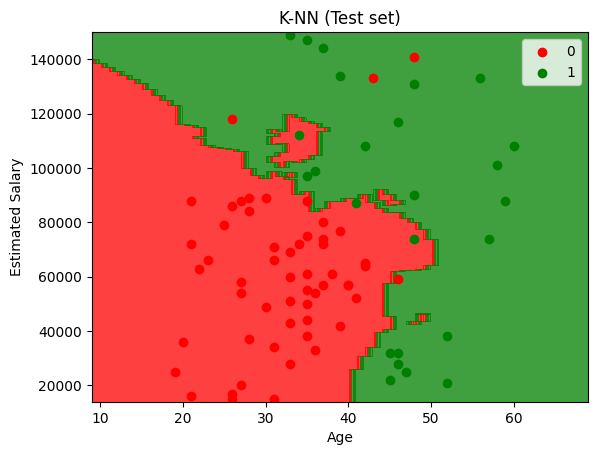

In [11]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()